Found 19986 images belonging to 26 classes.
Found 7512 images belonging to 26 classes.
Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 1118s 4s/step - accuracy: 0.2690 - loss: 2.5386 - val_accuracy: 0.5498 - val_loss: 1.5372
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4844 - loss: 1.7930 - val_accuracy: 0.6250 - val_loss: 1.4441
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 1156s 4s/step - accuracy: 0.4817 - loss: 1.7058 - val_accuracy: 0.6199 - val_loss: 1.2547
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5312 - loss: 1.7357 - val_accuracy: 0.6250 - val_loss: 1.3468
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 1149s 4s/step - accuracy: 0.5551 - loss: 1.4686 - val_accuracy: 0.6628 - val_loss: 1.1203
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6406 - loss: 1.2820 - val_accuracy: 0.5833 - val_loss: 1.3117
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 1167s 4s/step - accuracy: 0.5793 - loss: 1.3681 - val_accuracy: 0.6894 - val_loss: 1.0292
Epoch 8/2

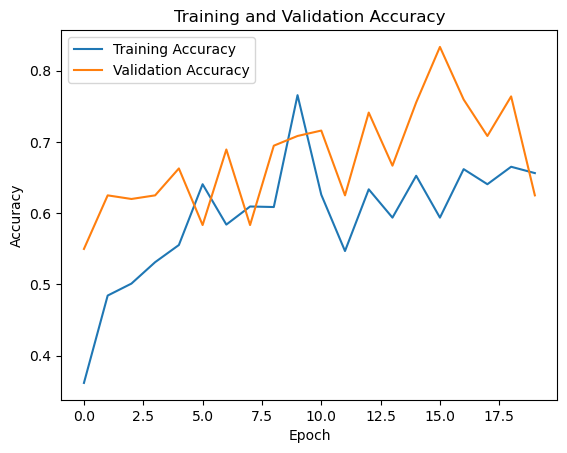

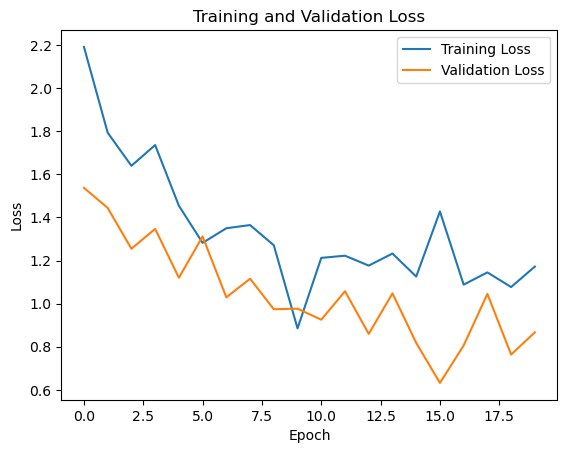

In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

# Define directory paths for training and validation data
train_dir = 'Augmented_data(1)/train'
val_dir = 'Augmented_data(1)/valid'


# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical",
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical",
)

# Number of classes for the output layer
num_classes = len(train_generator.class_indices)

# Load the pre-trained VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to retain pre-trained features
base_model.trainable = False

# Add custom classification layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Reduce spatial dimensions
    layers.Dense(512, activation="relu"),  # Reduce the size for compact learning
    layers.Dropout(0.5),  # Regularization to prevent overfitting
    layers.Dense(num_classes, activation="softmax"),  # Final layer for multi-class classification
])

# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
)

# Save the model for future use
model.save("vgg16_model.h5")

# Plot training history
# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [18]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# Directory paths
val_dir = 'Augmented_data(1)/valid'

# Load the saved model
model_path = "vgg16_model.h5"
model = load_model(model_path)

# Validation data preprocessing
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical",
    shuffle=False  # Ensures data order for confusion matrix computation
)

# Generate predictions on the validation dataset
val_generator.reset()
predictions = model.predict(val_generator, steps=val_generator.samples // val_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = val_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", cm)

# Classification report
target_names = list(val_generator.class_indices.keys())
print("\nClassification Report:\n", classification_report(true_classes, predicted_classes, target_names=target_names))


Found 7512 images belonging to 26 classes.


C:\Users\arshi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


118/118 ━━━━━━━━━━━━━━━━━━━━ 3309s 28s/step
Confusion Matrix:
 [[ 42   0   0   0   2   0   0   0   0   0   0   0   4   0   2   5   2   0
    6   0   0   0   4   2   1   2]
 [  0  18   0   0   0   0   4   0   0   0   0   0   0   0   0   0   0   3
    0   0   0   0   0   0   0   0]
 [  0   0  39   0   1   0   0   0   0   0   0   0   0   0   0  10   0   1
    0   2   0   0   0   0   0   0]
 [  0   0   0  35   1   0   0   0   0   0   0   0   0  10   0   1   1   1
    1   1   0   2   0   0   5   0]
 [  0   0   0   2 427   2   0   0   0  33  13  20   4  36   2   2  11  12
    2  40   0   4  27  32  12   0]
 [  0   0   0   0   1  33   0   0   0   1   1   0   5   1   1   0   6   2
    0   4   0   0   0   0   0   0]
 [  0   0   5   0   0   0  92   1   1   0   0   0   0   1   0   0   0   7
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  46  10   0   0   0   0   8   0   1   3   0
    4   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   2  59   0   0   0   0   0   0   0

Found 7512 images belonging to 26 classes.


C:\Users\arshi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


118/118 ━━━━━━━━━━━━━━━━━━━━ 307s 3s/step


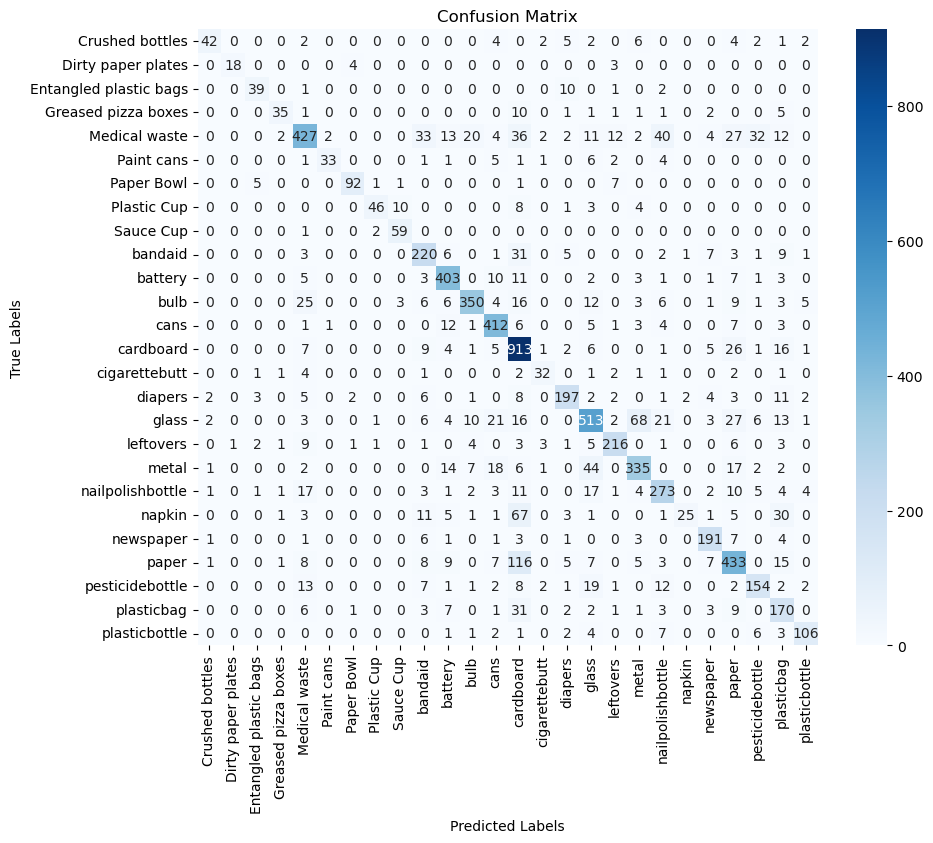

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Directory paths
val_dir = 'Augmented_data(1)/valid'

# Load the saved model
model_path = "vgg16_model.h5"
model = load_model(model_path)

# Validation data preprocessing
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical",
    shuffle=False  # Ensures data order for confusion matrix computation
)

# Generate predictions on the validation dataset
val_generator.reset()
predictions = model.predict(val_generator, steps=val_generator.samples // val_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = val_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
class_labels = list(val_generator.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()